Dùng word embedding (https://habr.com/en/company/vk/blog/449984/), chọn ra 10 từ bất kì, với mỗi từ tìm 10 từ có embedding gần nhất

nhận xét về ngữ nghĩa các từ có embedding gần nhau

dùng t-SNE giảm chiều các vector embedding về 2 chiều, nhận xét các cụm

In [2]:
import gensim
import numpy as np
# pre-trained model using Google News dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
copied_path = 'drive/MyDrive/GoogleNews-vectors-negative300.bin.gz'
model = gensim.models.KeyedVectors.load_word2vec_format(copied_path, binary=True)

In [6]:
model['Python']

array([ 1.63085938e-01, -2.04101562e-01, -2.20947266e-02,  7.95898438e-02,
       -2.01171875e-01, -3.75366211e-03,  1.49414062e-01,  3.24218750e-01,
        1.36718750e-01,  2.96875000e-01,  8.10546875e-02, -7.12890625e-02,
        2.16064453e-02, -3.49121094e-02, -1.48437500e-01, -2.51953125e-01,
        1.58203125e-01,  2.63671875e-01, -5.07812500e-01, -3.12500000e-01,
       -8.20312500e-02,  9.13085938e-02,  2.30468750e-01,  3.57421875e-01,
       -3.61633301e-03, -2.26562500e-01, -1.03515625e-01,  4.16015625e-01,
       -1.30004883e-02, -2.79296875e-01, -7.76367188e-02,  7.76367188e-02,
       -3.32031250e-01, -1.28906250e-01,  1.01562500e-01,  3.12500000e-02,
        1.56250000e-01,  1.51367188e-01, -6.93359375e-02,  2.19726562e-01,
        5.50781250e-01, -4.51660156e-02,  1.70898438e-01,  6.17187500e-01,
       -1.84570312e-01, -8.59375000e-02, -5.02929688e-02, -2.30468750e-01,
        3.58886719e-02,  3.08593750e-01, -3.90625000e-01, -4.76562500e-01,
        5.05371094e-02,  

In [4]:
# Find the top-N most similar words. Positive words contribute positively towards the similarity, negative words negatively.
model.most_similar(positive = 'Python')

[('Jython', 0.6152505874633789),
 ('Perl_Python', 0.5710949897766113),
 ('IronPython', 0.5704678893089294),
 ('scripting_languages', 0.5695090889930725),
 ('PHP_Perl', 0.5687724351882935),
 ('Java_Python', 0.568107008934021),
 ('PHP', 0.5660915374755859),
 ('Python_Ruby', 0.5632462501525879),
 ('Visual_Basic', 0.5603480339050293),
 ('Perl', 0.5530890226364136)]

In [5]:
keys = ['Paris', 'Python', 'Sunday', 'Tolstoy', 'Twitter', 'bachelor', 'delivery', 'election', 'expensive',
        'peace']

embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in model.most_similar(word, topn=10):
        words.append(similar_word)
        embeddings.append(model[similar_word])
    print(word, ': ', words)
    embedding_clusters.append(embeddings)
    word_clusters.append(words)


Paris :  ['Parisian', 'Hopital_Europeen_Georges_Pompidou', 'Spyker_D##_Peking', 'France', 'Pantheon_Sorbonne', 'Aeroports_De', 'Grigny_south', 'Place_Denfert_Rochereau', 'guest_Olivier_Dolige', 'Lazard_Freres_Banque']
Python :  ['Jython', 'Perl_Python', 'IronPython', 'scripting_languages', 'PHP_Perl', 'Java_Python', 'PHP', 'Python_Ruby', 'Visual_Basic', 'Perl']
Sunday :  ['Saturday', 'Friday', 'Monday', 'Thursday', 'Wednesday', 'Tuesday', 'evening', 'afternoon', 'Thurday', 'Feb.']
Tolstoy :  ['Leo_Tolstoy', 'writer_Leo_Tolstoy', 'Dostoevsky', 'novelist_Leo_Tolstoy', 'Tolstoys', 'Chekhov', 'Anna_Karenina', 'Dostoyevsky', 'Maxim_Gorky', 'Turgenev']
Twitter :  ['twitter', 'Twitter.com', 'Facebook', 'tweet', 'tweets', 'Tweet', 'tweeting', 'Tweets', 'TwitterTwitter', 'Tweeting']
bachelor :  ['bachelor_degree', 'Bachelor', 'bachelors_degree', 'master_degree', 'bachelors', 'undergraduate_degree', 'Bachelors', 'earned_bachelor_degree', 'Bachelor_Degree', 'doctorate']
delivery :  ['deliveries',

Embedding gần nhau thì nghĩa có liên quan tới nhau

In [6]:
from sklearn.manifold import TSNE

In [7]:
tsne_model_en_2d = TSNE(n_components=2, perplexity=10, learning_rate='auto', init='pca', n_iter=3500)
embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
embedding_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n*m, k))).reshape(n, m, 2)

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


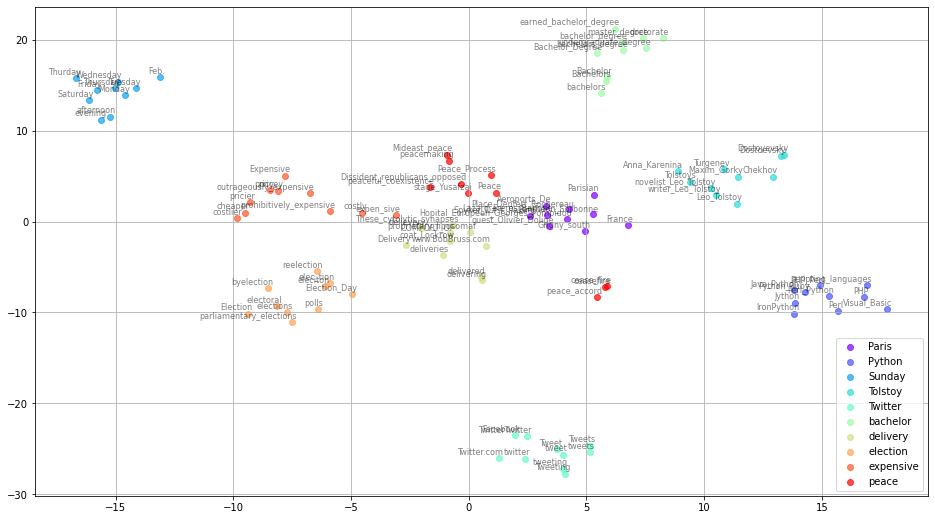

In [13]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
def tsne_plot_similar_words(labels, embedding_clusters, word_clusters, a=0.7):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:,0]
        y = embeddings[:,1]
        plt.scatter(x, y, c=color, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2), 
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.grid(True)
    # plt.savefig("f/г.png", format='png', dpi=150, bbox_inches='tight')
    plt.show()

tsne_plot_similar_words(keys, embedding_en_2d, word_clusters)
# def tsne_plot_similar_words(title, labels, embedding_clusters, word_clusters, a, filename=None):
#     plt.figure(figsize=(16, 9))
#     colors = cm.rainbow(np.linspace(0, 1, len(labels)))
#     for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
#         x = embeddings[:, 0]
#         y = embeddings[:, 1]
#         plt.scatter(x, y, c=color, alpha=a, label=label)
#         for i, word in enumerate(words):
#             plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
#                          textcoords='offset points', ha='right', va='bottom', size=8)
#     plt.legend(loc=4)
#     plt.title(title)
#     plt.grid(True)
#     if filename:
#         plt.savefig(filename, format='png', dpi=150, bbox_inches='tight')
#     plt.show()


# tsne_plot_similar_words('Similar words from Google News', keys, embedding_en_2d, word_clusters, 0.7,
#                         'similar_words.png')

Các cụm khá tách biệt, riêng có cụm 'delivery' và 'expensive' khá gần nhau